In [1]:
# for cleaning up after tests
import os
dir = "data/test_dir/"
for f in os.listdir(dir):
    if ".bin" in f:
        os.remove(os.path.join(dir, f))

In [2]:
from banners import *
# import csv_relations
import os
# get all dirs with data and order by date
data_dirs = []
root = "data/"
for dd in os.listdir(root):
    d = os.path.join(root, dd)
    print(d)
    if os.path.isdir(d):
        dir_files = Dir(d, dd)
        for f in os.listdir(d):
            if ".bag" in f:
                dir_files.bag = os.path.join(d, f)
            if ".csv" in f:
                dir_files.clicks = os.path.join(d, f)
        data_dirs.append(dir_files)

print(data_dirs)

TOPICS = ['/current_pose', '/cam0/nv12_decode_result', '/cam1/nv12_decode_result', '/therm/image_raw_throttle']

processed_data = []

# process each bag
for a in data_dirs:
    cc = CameraCombo(a)
    bag = rosbag.Bag(a.bag)
    for topic, msg, t in bag.read_messages(TOPICS):
        # print(topic)
        # stack 3 images together
        if topic == '/therm/image_raw_throttle':
            # print("thermal")
            cc.flir = msg
        if topic == '/cam1/nv12_decode_result':
            # print("rgb")
            cc.rgb = msg
        if topic == '/cam0/nv12_decode_result':
            # print("noir")
            cc.noir = msg
        if topic == "/current_pose":
            print("stacking")
            cc.pose = msg.pose.pose
            cc.stack(t)
    processed_data.append(cc)
    cc.done()


    # get pose of stack
    # compute coords(xmin, ymin & xmax, ymax) of each stack
processed_data[0].parsed["xmax"]

data/test_dir
[Dir(path='data/test_dir', date='test_dir', bag='data/test_dir/2023-01-24-12-39-42.bag', clicks='data/test_dir/Data0.csv')]
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stacking
stackin

0       1.999986e+06
1       1.999986e+06
2       1.999986e+06
3       1.999986e+06
4       1.999986e+06
            ...     
2457    5.841019e+05
2458    5.841016e+05
2459    5.841016e+05
2460    5.841016e+05
2461    5.841014e+05
Name: xmax, Length: 2462, dtype: float64

In [3]:
# type(processed_data[0].parsed['pose'][0])
# print(processed_data[0].parsed['xmax'].max(axis=0))
# print(processed_data[0].parsed['xmax'].min(axis=0))
# print(processed_data[0].parsed['ymax'].max(axis=0))
# print(processed_data[0].parsed['ymax'].min(axis=0))
# data_dirs[0].clicks

In [4]:
# print(processed_data[0].parsed.pose[0])
# print(processed_data[0].parsed.pose[0])

# print(processed_data[0].parsed.pose[10][0, 3])
# print(processed_data[0].parsed.pose[10][1, 3])

In [5]:
# print(processed_data[0].parsed.pose.map(lambda x: x[0, 3]).min(axis=0))
# print(processed_data[0].parsed.pose.map(lambda x: x[0, 3]).max(axis=0))
# print(processed_data[0].parsed.pose.map(lambda x: x[1, 3]).min(axis=0))
# print(processed_data[0].parsed.pose.map(lambda x: x[1, 3]).max(axis=0))

In [6]:
import csv
import csv_relations
import pymap3d as pm
import utm
proc_click = []

origin = None

# go over the CSVs
for a in data_dirs:
    C = csv_relations.CSVAugmented(a.path)
    with open(a.clicks) as clicks:
        reader = csv.reader(clicks)
        for line in reader:
            if origin == None:
                origin = [float(line[0]), float(line[1]), float(line[2])]
            # breakdown line
            u = utm.from_latlon(float(line[0]), float(line[1]))
            # u = pm.geodetic2ned(float(line[0]), float(line[1]), float(line[2]), origin[0], origin[1], origin[2])
            pt = [u[0], u[1]]
            print(u)
            health = int(line[-1])
            
            C.jungler(pt, health, processed_data)

    C.done()
    proc_click.append(C)

(584117.9067661016, 4093375.1608469607, 10, 'S')
1366    data/test_dir/stacked_1674593058.419452158.bin
1367    data/test_dir/stacked_1674593058.619295171.bin
1368    data/test_dir/stacked_1674593058.819392715.bin
1369     data/test_dir/stacked_1674593059.19749526.bin
2323    data/test_dir/stacked_1674593250.393662192.bin
2324    data/test_dir/stacked_1674593250.549231434.bin
2325    data/test_dir/stacked_1674593250.802911748.bin
2326    data/test_dir/stacked_1674593250.949266723.bin
2327    data/test_dir/stacked_1674593251.149145270.bin
2346    data/test_dir/stacked_1674593254.949156983.bin
2347    data/test_dir/stacked_1674593255.149159786.bin
2348    data/test_dir/stacked_1674593255.393803300.bin
2349    data/test_dir/stacked_1674593255.549133788.bin
2350    data/test_dir/stacked_1674593255.868490121.bin
2351    data/test_dir/stacked_1674593255.949396640.bin
2352    data/test_dir/stacked_1674593256.149305177.bin
2353    data/test_dir/stacked_1674593256.383683981.bin
2354    data/tes

In [7]:
print(proc_click[0].related["x"].max(axis=0) - processed_data[0].parsed.pose.map(lambda x: x[0, 3]).max(axis=0))
print(proc_click[0].related["x"].min(axis=0) - processed_data[0].parsed.pose.map(lambda x: x[0, 3]).min(axis=0))
print(proc_click[0].related["y"].max(axis=0) - processed_data[0].parsed.pose.map(lambda x: x[1, 3]).max(axis=0))
print(proc_click[0].related["y"].min(axis=0) - processed_data[0].parsed.pose.map(lambda x: x[1, 3]).min(axis=0))

-1415811.865989245
369533.6477744338
-4728.257442008238
3119793.8430679953


In [8]:
# proc_click[0].related.relevant.map(lambda c: len(c)).max(axis=0)
# proc_click[0].related.y

667     584117.531273
668     584117.694764
669     584117.827343
670     584117.979929
671     584118.162516
            ...      
2290    584119.506035
2291    584118.838950
2292    584118.436987
2293    584117.580609
2294    584117.570654
Name: pose, Length: 1493, dtype: float64


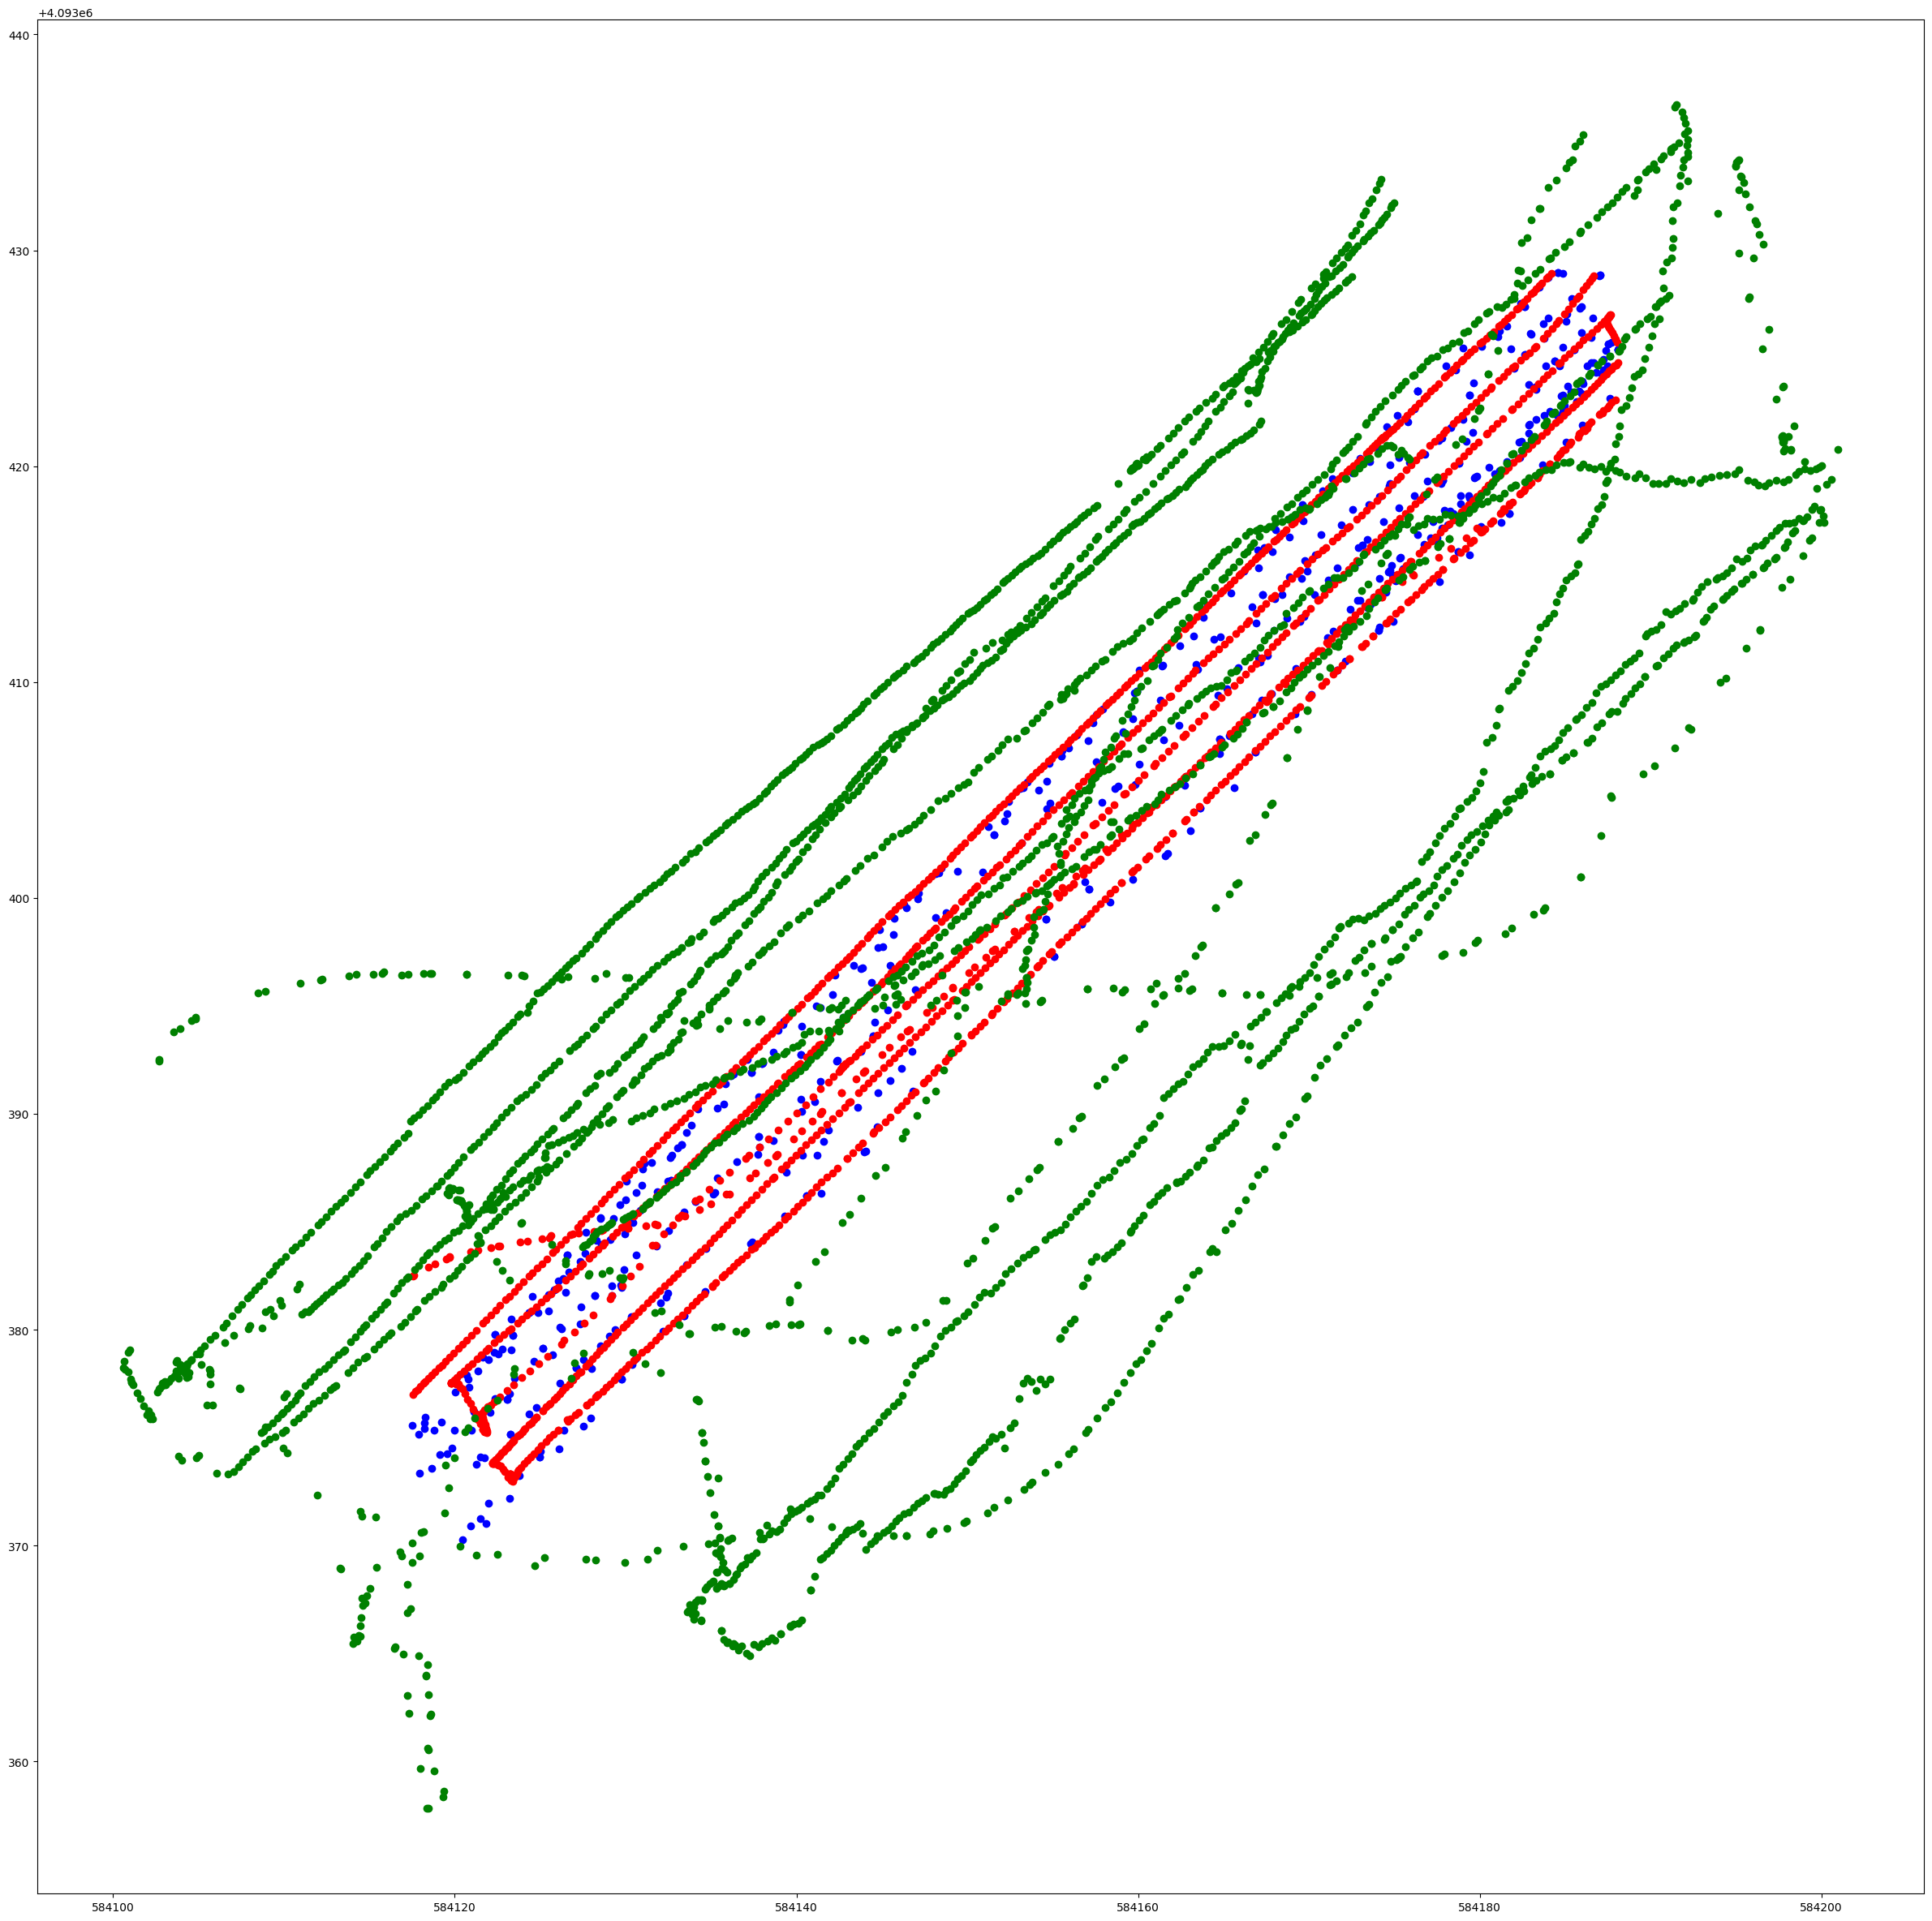

In [12]:
import matplotlib.pyplot as plt

max_x = proc_click[0].related["x"].max(axis=0)
min_x = proc_click[0].related["x"].min(axis=0)
max_y = proc_click[0].related["y"].max(axis=0)
min_y = proc_click[0].related["y"].min(axis=0)

# plot click data
plt.figure(figsize=(30, 30))
plt.scatter(proc_click[0].related.x, proc_click[0].related.y, c='b')
p_x = processed_data[0].parsed.pose.map(lambda x: x[0, 3])
p_y = processed_data[0].parsed.pose.map(lambda x: x[1, 3])
zone = (p_x >= min_x) & (p_x <= max_x) & (p_y >= min_y) & (p_y <= max_y)
# vx_zone
vx_max = processed_data[0].parsed.xmax[zone]
vy_max = processed_data[0].parsed.ymax[zone]
vx_min = processed_data[0].parsed.xmin[zone]
vy_min = processed_data[0].parsed.ymin[zone]
pux = p_x[zone]
puy = p_y[zone]
print(pux)
plt.scatter(pux, puy, c="r")
plt.scatter(vx_max, vy_max, c="g")
plt.scatter(vx_min, vy_min, c="g")
plt.show()

In [ ]:
# back projection time